In [1]:
import pandas as pd
import numpy as np

### Task 1

In [2]:
cols = ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 
        'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 
        'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
cars = pd.read_csv('imports-85.data', names=cols)

Select only the columns with continuous values from datasets documentation

Features: [normalized-losses, wheel-base,length,width, height,curb-weight, engine-size,bore,stroke, compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg] 

Target: Price

In [3]:
continuous_values_cols = ['normalized-losses', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'bore', 'stroke', 'compression-rate', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']
numeric_cars = cars[continuous_values_cols]

### Task 2: Data Cleaning

In [4]:
numeric_cars = numeric_cars.replace('?',np.nan)

In [5]:
    # Below columns need to be converted to numertic type
    # normalized-losses,bore, stroke, horsepower, peak-rpm & price
numeric_cars = numeric_cars.astype('float')
numeric_cars.isnull().sum()

normalized-losses    41
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-size           0
bore                  4
stroke                4
compression-rate      0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [6]:
# Because `price` is the column we want to predict, let's remove any rows with missing `price` values.
numeric_cars = numeric_cars.dropna(subset=['price'])

# Replace missing values in other columns using column means.
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
price_col = numeric_cars['price'] 
numeric_cars.isnull().sum()

normalized-losses    0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-size          0
bore                 0
stroke               0
compression-rate     0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
# To scale data
  ## Method 1
  
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
column = numeric_cars.drop(columns='price').columns

numeric_cars = scaler.fit_transform(numeric_cars[column])
numeric_cars = pd.DataFrame(numeric_cars, columns=column)

numeric_cars['price'] = price_col
numeric_cars = numeric_cars.dropna(subset=['price'])

numeric_cars.head()

,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-rate,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,13495.0
1,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,16500.0
2,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,16500.0
3,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,13950.0
4,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,17450.0


In [8]:
 ## Or Method 2
    
# Normalize all columnns to range from 0 to 1 except the target column.
#price_col = numeric_cars['price']
#numeric_cars = (numeric_cars - numeric_cars.min())/(numeric_cars.max() - numeric_cars.min())
#numeric_cars['price'] = price_col    

### Step3 : univariate model

In [9]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

def knn_train_test(train_col, target, df):
    
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)  
    feature = rand_df[train_col] 
    y = rand_df[target]
    
    x_train,x_test,y_train,y_test = train_test_split(feature,y,test_size=0.2)
    # Fit a KNN model 
    knn.fit(x_train, y_train)
    # Make a prediction
    predictions = knn.predict(x_test)
    
    # Calculate and return RMSE.
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return rmse
    

In [10]:
rmse_score = {}
feature_cols = list(numeric_cars.drop(columns='price').columns)

for feature in feature_cols:
    rmse = knn_train_test([feature],'price', numeric_cars)
    rmse_score[feature] = rmse
rmse_score    

{'bore': 8176.621612438721,
 'city-mpg': 8199.617199662433,
 'compression-rate': 8554.969552429746,
 'curb-weight': 8317.706049025777,
 'engine-size': 7965.283888475037,
 'height': 8493.70486742976,
 'highway-mpg': 8446.257407159694,
 'horsepower': 8181.017333926143,
 'length': 8264.16009852181,
 'normalized-losses': 8741.615053924532,
 'peak-rpm': 9443.089597266351,
 'stroke': 8449.021079036316,
 'wheel-base': 7993.622317760579,
 'width': 8189.035229622596}

In [11]:
# Create a Series object from the dictionary so 
# we can easily view the results, sort, etc
rmse_results_series = pd.Series(rmse_score)
rmse_results_series.sort_values()

engine-size          7965.283888
wheel-base           7993.622318
bore                 8176.621612
horsepower           8181.017334
width                8189.035230
city-mpg             8199.617200
length               8264.160099
curb-weight          8317.706049
highway-mpg          8446.257407
stroke               8449.021079
height               8493.704867
compression-rate     8554.969552
normalized-losses    8741.615054
peak-rpm             9443.089597
dtype: float64

In [12]:
k_values = [1,3,5,7,9]

def knn_train_test(train_col, target, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)  
    feature = rand_df[train_col] 
    y = rand_df[target]
    
    x_train,x_test,y_train,y_test = train_test_split(feature,y,test_size=0.2)
    
    k_rmses = {}
    for k in k_values:
        
        knn = KNeighborsRegressor(n_neighbors=k)
        # Fit a KNN model 
        knn.fit(x_train, y_train)
        # Make a prediction
        predictions = knn.predict(x_test)
        # Calculate and return RMSE.
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses
    

In [13]:
k_rmses_results = {}
feature_cols = list(numeric_cars.drop(columns='price').columns)

for feature in feature_cols:
    k_rmse = knn_train_test([feature],'price', numeric_cars)
    k_rmses_results[feature] = k_rmse
k_rmses_results 

{'bore': {1: 11825.571461878702,
  3: 8768.00376352692,
  5: 8176.621612438721,
  7: 8147.932217778337,
  9: 8249.646749339567},
 'city-mpg': {1: 9391.192675853265,
  3: 8277.877431409845,
  5: 8199.617199662433,
  7: 7942.355336377598,
  9: 7914.715429244814},
 'compression-rate': {1: 13692.032892342904,
  3: 9592.821740904903,
  5: 8554.969552429746,
  7: 8566.478522742718,
  9: 8465.599352965995},
 'curb-weight': {1: 10257.304074414486,
  3: 8284.542506144266,
  5: 8317.706049025777,
  7: 8096.566656929469,
  9: 8149.330971990853},
 'engine-size': {1: 9796.430399640472,
  3: 7968.194638164071,
  5: 7965.283888475037,
  7: 8067.022394430605,
  9: 7963.334205908979},
 'height': {1: 9612.676137527988,
  3: 8342.987407930621,
  5: 8493.70486742976,
  7: 8264.03809920441,
  9: 8266.432456882325},
 'highway-mpg': {1: 9350.714909834434,
  3: 9010.995203237973,
  5: 8446.257407159694,
  7: 8519.892149450327,
  9: 8125.578746434384},
 'horsepower': {1: 8343.169635995662,
  3: 8125.8025048128

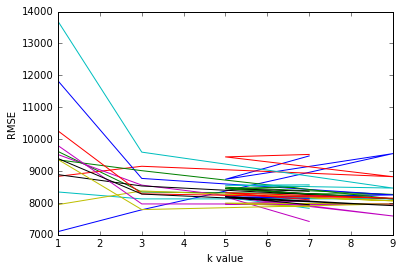

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
for k,v in k_rmses_results.items():
    x = list(v.keys())
    y = list(v.values())
    
    plt.plot(x,y)
    plt.xlabel('k value')
    plt.ylabel('RMSE')


### Task 4: Multivariate Model

In [15]:
def knn_train_test(train_col_list, target, df):
    
    knn = KNeighborsRegressor()
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)  
    feature = rand_df[train_col_list] 
    y = rand_df[target]
    
    x_train,x_test,y_train,y_test = train_test_split(feature,y,test_size=0.2)
    # Fit a KNN model 
    knn.fit(x_train, y_train)
    # Make a prediction
    predictions = knn.predict(x_test)
    
    # Calculate and return RMSE.
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    return rmse

feature_cols = list(numeric_cars.drop(columns='price').columns)

rmse = knn_train_test(feature_cols,'price', numeric_cars)
rmse

7062.644963680392

In [16]:
# Compute average RMSE across different `k` values for each feature.
feature_avg_rmse = {}
for k,v in k_rmses_results.items():
    avg_rmse = np.mean(list(v.values()))
    feature_avg_rmse[k] = avg_rmse
series_avg_rmse = pd.Series(feature_avg_rmse)
sorted_series_avg_rmse = series_avg_rmse.sort_values()
print(sorted_series_avg_rmse)

sorted_series_avg_rmse

horsepower           8121.425150
length               8175.886843
wheel-base           8198.324176
width                8254.341236
city-mpg             8345.151615
engine-size          8352.053105
stroke               8472.626832
normalized-losses    8529.348586
height               8595.967794
curb-weight          8621.090052
highway-mpg          8690.687683
bore                 9033.555161
peak-rpm             9153.745322
compression-rate     9774.380412
dtype: float64


horsepower           8121.425150
length               8175.886843
wheel-base           8198.324176
width                8254.341236
city-mpg             8345.151615
engine-size          8352.053105
stroke               8472.626832
normalized-losses    8529.348586
height               8595.967794
curb-weight          8621.090052
highway-mpg          8690.687683
bore                 9033.555161
peak-rpm             9153.745322
compression-rate     9774.380412
dtype: float64

In [17]:
top_features = [2,3,4,5]

best_results = {}

for i in top_features:
    features = list(sorted_series_avg_rmse[:i].index)
    rmse = knn_train_test(features,'price', numeric_cars)
    best_results[i] = rmse
    
best_results

{2: 8534.288452765117,
 3: 7611.16795853304,
 4: 5942.747590803433,
 5: 7071.127778013915}

### Task 5: Hyperparameter Tuning

In [18]:
k_values = list(range(1,26))

def knn_train_test(train_cols, target, df):
    np.random.seed(1)
        
    # Randomize order of rows in data frame.
    shuffled_index = np.random.permutation(df.index)
    rand_df = df.reindex(shuffled_index)  
    feature = rand_df[train_cols] 
    y = rand_df[target]
    
    x_train,x_test,y_train,y_test = train_test_split(feature,y,test_size=0.2)
    
    k_rmses = {}
    for k in k_values:
        
        knn = KNeighborsRegressor(n_neighbors=k)
        # Fit a KNN model 
        knn.fit(x_train, y_train)
        # Make a prediction
        predictions = knn.predict(x_test)
        # Calculate and return RMSE.
        mse = mean_squared_error(y_test, predictions)
        rmse = np.sqrt(mse)
        k_rmses[k] = rmse
    return k_rmses

In [19]:
top_features = list(range(2,8))

best_results = {}

for i in top_features:
    features = list(sorted_series_avg_rmse[:i].index)
    k_rmses = knn_train_test(features,'price', numeric_cars)
    best_results[i] = k_rmses
    
best_results

{2: {1: 8747.906692460774,
  2: 8453.553802247905,
  3: 8413.278815856118,
  4: 8529.249955850455,
  5: 8534.288452765117,
  6: 8054.392416218894,
  7: 8088.5867235688265,
  8: 7876.814693269695,
  9: 7689.95310768907,
  10: 7804.506256980643,
  11: 7547.8471891872805,
  12: 7576.024343511063,
  13: 7610.989323594912,
  14: 7621.429810834683,
  15: 7732.887040146563,
  16: 7720.1445362471595,
  17: 7774.486285841464,
  18: 7774.990339217332,
  19: 7782.614245917741,
  20: 7784.729094957319,
  21: 7835.2441573056185,
  22: 7831.6130219560455,
  23: 7843.883363987225,
  24: 7793.797513114774,
  25: 7802.201407602856},
 3: {1: 8481.256910092985,
  2: 7950.76207117909,
  3: 7909.697528280641,
  4: 7501.687849556758,
  5: 7611.16795853304,
  6: 7281.0958483920695,
  7: 7619.871719787703,
  8: 7275.658064550974,
  9: 7539.294433516104,
  10: 7542.270477531948,
  11: 7605.537463131661,
  12: 7685.121821759092,
  13: 7798.537102204968,
  14: 7950.582218725191,
  15: 7986.690123755203,
  16: 79

In [20]:
opt_k_values = {}
for k, v in best_results.items():
    min_v = min(v, key = v.get)
    opt_k_values[k] = min_v
opt_k_values    

{2: 11, 3: 8, 4: 5, 5: 6, 6: 6, 7: 4}

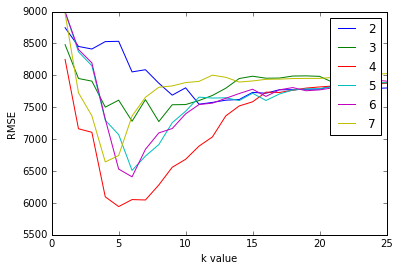

In [23]:
for k, v in best_results.items():
    x = list(v.keys())
    y = list(v.values()) 
    plt.plot(x,y, label="{}".format(k))
   
plt.xlabel('k value')
plt.ylabel('RMSE')
plt.legend()